# Project X: Covid-19 Diagnosis from Chest X-Ray

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import glob
import matplotlib.image as mpimg
import os
import PIL
import PIL.Image
import tensorflow as tf

In [4]:
batch_size = 32
img_height = 200
img_width = 200
seed = 42
data_dir = './with_pneumonia/'

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'training',
    seed = seed,
    image_size = (img_height, img_width),
    batch_size =  batch_size)

Found 15153 files belonging to 3 classes.
Using 12123 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = seed,
    image_size = (img_height, img_width),
    batch_size =  batch_size)

Found 15153 files belonging to 3 classes.
Using 3030 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['covid', 'normal', 'pneumonia']


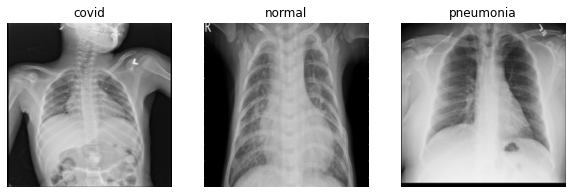

In [8]:
plt.figure(figsize = (10,5))
for images, labels in train_ds.take(1):
    for i in range(3):
        ax = plt.subplot(1,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[i])
        plt.axis('off')

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [20]:
model = Sequential([
    Conv2D(64,(2,2),activation='relu',input_shape=(200,200,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32,(2,2),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation= 'relu'),
    Dropout(0.5),
    Dense(128, activation= 'relu'),
    Dropout(0.5),
    Dense(3, activation = 'softmax')
])

In [26]:
model.compile(optimizer = 'adam', loss = 'SparseCategoricalCrossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 199, 199, 64)      832       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 99, 99, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 98, 98, 32)        8224      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 76832)             0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [27]:
history = model.fit(train_ds, epochs = 15, validation_data = val_ds)

Epoch 1/15
379/379 [==============================] - 321s 846ms/step - loss: 6.5852 - accuracy: 0.7283 - val_loss: 0.4674 - val_accuracy: 0.7987
Epoch 2/15
379/379 [==============================] - 310s 818ms/step - loss: 0.4699 - accuracy: 0.8082 - val_loss: 0.4186 - val_accuracy: 0.8125
Epoch 3/15
379/379 [==============================] - 351s 925ms/step - loss: 0.3983 - accuracy: 0.8354 - val_loss: 0.3828 - val_accuracy: 0.8300
Epoch 4/15
379/379 [==============================] - 338s 891ms/step - loss: 0.3401 - accuracy: 0.8647 - val_loss: 0.3900 - val_accuracy: 0.8294
Epoch 5/15
379/379 [==============================] - 347s 916ms/step - loss: 0.3072 - accuracy: 0.8769 - val_loss: 0.3568 - val_accuracy: 0.8446
Epoch 6/15
379/379 [==============================] - 370s 975ms/step - loss: 0.2635 - accuracy: 0.8933 - val_loss: 0.3610 - val_accuracy: 0.8601
Epoch 7/15
379/379 [==============================] - 375s 990ms/step - loss: 0.2405 - accuracy: 0.9078 - val_loss: 0.3781 -

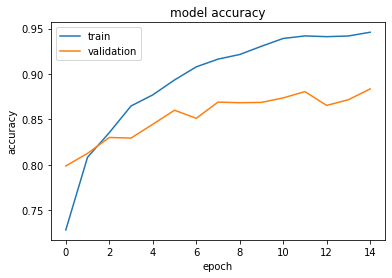

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

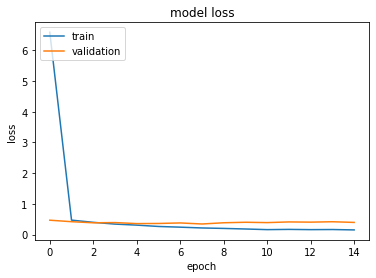

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [30]:
test_loss, test_acc = model.evaluate(val_ds, verbose=2)

95/95 - 16s - loss: 0.3951 - accuracy: 0.8835 - 16s/epoch - 170ms/step


In [31]:
print(f'Final Model Accuracy: {round(test_acc*100, 2)}%')

Final Model Accuracy: 88.35%
